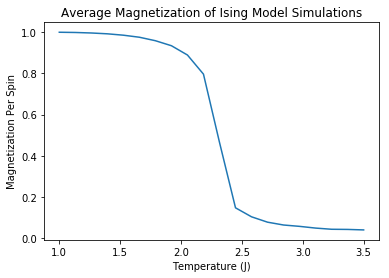

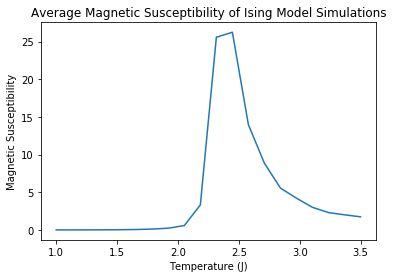

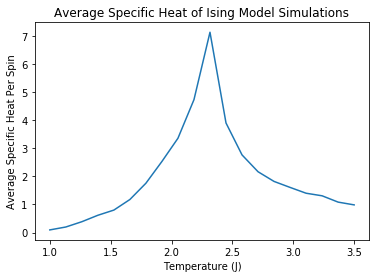

Estimated value of beta: 0.08317709120202671
Error: 0.0076166720757154804
Estimated value of gamma: -2.67554682591452
Error: 0.27551898172790235


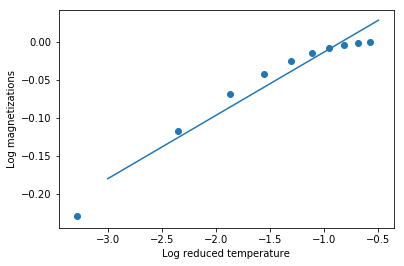

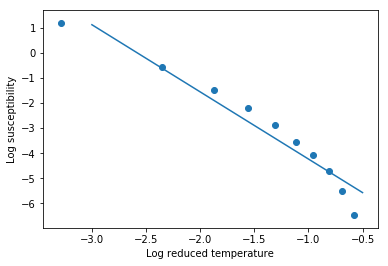

In [170]:
# load data

import matplotlib.pyplot as plt
import numpy as np
import pickle

class Experiment(object):
    def __init__(self, all_metrics, temperatures):
        self.all_metrics = all_metrics
        self.temperatures = temperatures

def make_plots(datafile):
    with open(datafile, 'rb') as f:
        data = pickle.load(f)

    temperatures = data.temperatures
    sort_indices = np.argsort(temperatures)
    temperatures = sorted(temperatures)
    magnetizations = np.array([m.magnetization for m in data.all_metrics])[sort_indices]
    susceptibilitys = np.array([m.susceptibility for m in data.all_metrics])[sort_indices]
    specific_heats = np.array([m.specific_heat for m in data.all_metrics])[sort_indices]

    # plot initial magnetization

    plt.plot(temperatures, magnetizations)
    plt.xlabel("Temperature (J)")
    plt.ylabel("Magnetization Per Spin")
    plt.title("Average Magnetization of Ising Model Simulations")
    plt.show()
    
    # plot initial susceptibility

    plt.plot(temperatures, susceptibilitys)
    plt.xlabel("Temperature (J)")
    plt.ylabel("Magnetic Susceptibility")
    plt.title("Average Magnetic Susceptibility of Ising Model Simulations")
    plt.show()
    
    # plot initial specific heats

    plt.plot(temperatures, specific_heats)
    plt.xlabel("Temperature (J)")
    plt.ylabel("Average Specific Heat Per Spin")
    plt.title("Average Specific Heat of Ising Model Simulations")
    plt.show()
    
    # filter data
    
    filtered_reduced_temperatures = []
    filtered_magnetizations = []
    filtered_susceptibilitys = []
    filtered_specific_heats = []
    T_CRITICAL = 2.269

    for t, m, x, c in zip(temperatures, magnetizations, susceptibilitys, specific_heats):
        if temperature < T_CRITICAL:
            reduced_temperature = abs(t-T_CRITICAL)/T_CRITICAL
            if np.log(reduced_temperature) < -0.5 and t < T_CRITICAL:
                filtered_reduced_temperatures.append(abs(t-T_CRITICAL)/T_CRITICAL)
                filtered_magnetizations.append(m)
                filtered_specific_heats.append(c)
                filtered_susceptibilitys.append(x)

    coef_m, cov_m = np.polyfit(np.log(filtered_reduced_temperatures), np.log(filtered_magnetizations), deg=1, cov=True)
    print("Estimated value of beta:", coef_m[0])
    print("Error:", np.sqrt(cov_m[0,0]))
    
    coef_x, cov_x = np.polyfit(np.log(filtered_reduced_temperatures), np.log(filtered_susceptibilitys), deg=1, cov=True)
    print("Estimated value of gamma:", coef_x[0])
    print("Error:", np.sqrt(cov_x[0,0]))
    
    #coef_c, cov_c = np.polyfit(np.log(filtered_reduced_temperatures), np.log(filtered_specific_heats), deg=1, cov=True)
    #print("Estimated value of alpha:", coef_c[0])
    #print("Error:", np.sqrt(cov_c[0,0]))
    
    xrng = np.linspace(-3,-0.5)
    
    plt.plot(xrng, coef_m[0]*xrng + coef_m[1])
    plt.scatter(np.log(filtered_reduced_temperatures), np.log(filtered_magnetizations))
    plt.xlabel("Log reduced temperature")
    plt.ylabel("Log magnetizations")
    plt.show()
    
    plt.plot(xrng, coef_x[0]*xrng + coef_x[1])
    plt.scatter(np.log(filtered_reduced_temperatures), np.log(filtered_susceptibilitys))
    plt.xlabel("Log reduced temperature")
    plt.ylabel("Log susceptibility")
    plt.show()
    


    

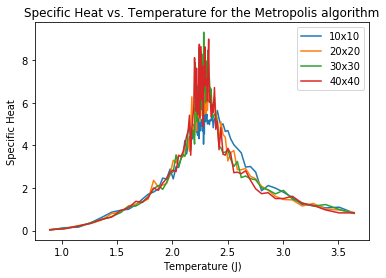

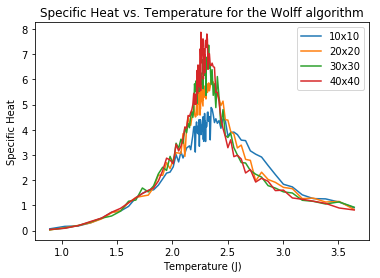

In [226]:
WOLFF_DATA_FILES = ["wolff_10x10_critical_5000iter_2sidedlog_close.pkl",
             "wolff_20x20_critical_5000iter_2sidedlog_close.pkl",
             "wolff_30x30_critical_5000iter_2sidedlog_close.pkl",
             "wolff_40x40_critical_5000iter_2sidedlog_close.pkl"]
NAMES = ["10x10", "20x20", "30x30", "40x40"]

METRO_DATA_FILES = ["metropolis_10x10_critical_5000iter_2sidedlog_close.pkl",
                   "metropolis_20x20_critical_5000iter_2sidedlog_close.pkl",
                   "metropolis_30x30_critical_5000iter_2sidedlog_close.pkl",
                   "metropolis_40x40_critical_5000iter_2sidedlog_close.pkl"]
METRO_NAMES = ["10x10", "20x20", "30x30", "40x40"]

def plot_multiple_magnetization(list_of_data_files, list_of_names, title):
    for file, name in zip(list_of_data_files, list_of_names):
        with open(file, 'rb') as f:
            data = pickle.load(f)
            temperatures = data.temperatures
            sort_indices = np.argsort(temperatures)
            temperatures = sorted(temperatures)
            magnetizations = np.array([m.magnetization for m in data.all_metrics])[sort_indices]
            plt.plot(temperatures, magnetizations, label=name)
    plt.title(title)
    plt.xlabel("Temperature (J)")
    plt.ylabel("Absolute magnetization per spin")
    plt.legend()
    plt.show()

def plot_multiple_susceptibility(list_of_data_files, list_of_names, title):
    for file, name in zip(list_of_data_files, list_of_names):
        with open(file, 'rb') as f:
            data = pickle.load(f)
            temperatures = data.temperatures
            sort_indices = np.argsort(temperatures)
            temperatures = sorted(temperatures)
            susceptibilitys = np.array([m.susceptibility for m in data.all_metrics])[sort_indices]
            plt.plot(temperatures, susceptibilitys, label=name)
    plt.title(title)
    plt.xlabel("Temperature (J)")
    plt.ylabel("Susceptibility")
    plt.legend()
    plt.show()    

def plot_multiple_specific_heat(list_of_data_files, list_of_names, title):
    for file, name in zip(list_of_data_files, list_of_names):
        with open(file, 'rb') as f:
            data = pickle.load(f)
            temperatures = data.temperatures
            sort_indices = np.argsort(temperatures)
            temperatures = sorted(temperatures)
            specific_heats = np.array([m.specific_heat for m in data.all_metrics])[sort_indices]
            plt.plot(temperatures, specific_heats, label=name)
    plt.title(title)
    plt.xlabel("Temperature (J)")
    plt.ylabel("Specific Heat")
    plt.legend()
    plt.show()    

#plot_multiple_magnetization(METRO_DATA_FILES, METRO_NAMES, "Magnetization vs. Temperature for the Metropolis algorithm")
#plot_multiple_susceptibility(METRO_DATA_FILES, METRO_NAMES, "Susceptibility vs. Temperature for the Metropolis algorithm")
plot_multiple_specific_heat(METRO_DATA_FILES, METRO_NAMES, "Specific Heat vs. Temperature for the Metropolis algorithm")
    
#plot_multiple_magnetization(WOLFF_DATA_FILES, NAMES, "Magnetization vs. Temperature for the Wolff algorithm")
#plot_multiple_susceptibility(WOLFF_DATA_FILES, NAMES, "Susceptibility vs. Temperature for the Wolff algorithm")
plot_multiple_specific_heat(WOLFF_DATA_FILES, NAMES, "Specific Heat vs. Temperature for the Wolff algorithm")

Estimated value of gamma: 1.127530196213406
Error: 0.08862551904933462


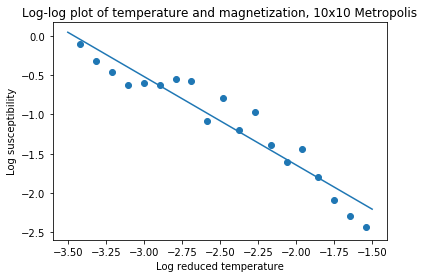

Estimated value of gamma: 1.6263241271414342
Error: 0.10472346128104341


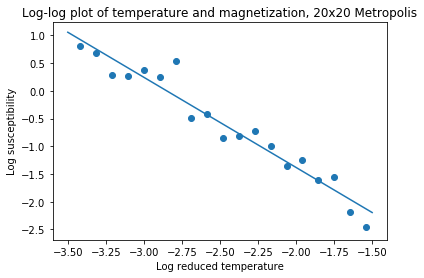

Estimated value of gamma: 1.6943582740453302
Error: 0.06557811402796379


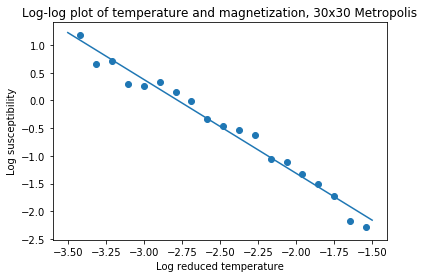

Estimated value of gamma: 1.7893738433491806
Error: 0.058402210108839316


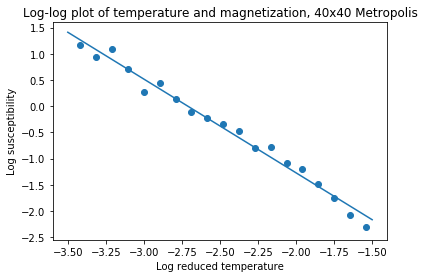

In [254]:
def fit_beta(data_file, title):
    with open(data_file, 'rb') as f:
        data = pickle.load(f)
    temperatures = data.temperatures
    sort_indices = np.argsort(temperatures)
    temperatures = sorted(temperatures)
    magnetizations = np.array([m.magnetization for m in data.all_metrics])[sort_indices]
    
    filtered_reduced_temperatures = []
    filtered_magnetizations = []
    T_CRITICAL = 2.269

    for t, m in zip(temperatures, magnetizations):
        if t < T_CRITICAL:
            reduced_temperature = abs(t-T_CRITICAL)/T_CRITICAL
            if np.log(reduced_temperature) < -1.5 and np.log(reduced_temperature) > -3.5:
                filtered_reduced_temperatures.append(abs(t-T_CRITICAL)/T_CRITICAL)
                filtered_magnetizations.append(m)
    
    coef_m, cov_m = np.polyfit(np.log(filtered_reduced_temperatures), np.log(filtered_magnetizations), deg=1, cov=True)
    print("Estimated value of beta:", coef_m[0])
    print("Error:", np.sqrt(cov_m[0,0]))
    
    xrng = np.linspace(-3.5,-1.5)
    
    plt.plot(xrng, coef_m[0]*xrng + coef_m[1])
    plt.scatter(np.log(filtered_reduced_temperatures), np.log(filtered_magnetizations))
    plt.xlabel("Log reduced temperature")
    plt.ylabel("Log magnetizations")
    plt.title(title)
    plt.show()

def fit_gamma(data_file, title):
    with open(data_file, 'rb') as f:
        data = pickle.load(f)
    temperatures = data.temperatures
    sort_indices = np.argsort(temperatures)
    temperatures = sorted(temperatures)
    susceptibilitys = np.array([m.susceptibility for m in data.all_metrics])[sort_indices]
    
    filtered_reduced_temperatures = []
    filtered_susceptibilitys = []
    T_CRITICAL = 2.269

    for t, x in zip(temperatures, susceptibilitys):
        if t < T_CRITICAL:
            reduced_temperature = abs(t-T_CRITICAL)/T_CRITICAL
            if np.log(reduced_temperature) < -1.5 and np.log(reduced_temperature) > -3.5:
                filtered_reduced_temperatures.append(abs(t-T_CRITICAL)/T_CRITICAL)
                filtered_susceptibilitys.append(x)
    
    coef_m, cov_m = np.polyfit(np.log(filtered_reduced_temperatures), np.log(filtered_susceptibilitys), deg=1, cov=True)
    print("Estimated value of gamma:", -coef_m[0])
    print("Error:", np.sqrt(cov_m[0,0]))
    
    xrng = np.linspace(-3.5,-1.5)
    
    plt.plot(xrng, coef_m[0]*xrng + coef_m[1])
    plt.scatter(np.log(filtered_reduced_temperatures), np.log(filtered_susceptibilitys))
    plt.xlabel("Log reduced temperature")
    plt.ylabel("Log susceptibility")
    plt.title(title)
    plt.show()

from scipy.optimize import curve_fit
def fit_alpha(data_file, title):
    with open(data_file, 'rb') as f:
        data = pickle.load(f)
    temperatures = data.temperatures
    sort_indices = np.argsort(temperatures)
    temperatures = sorted(temperatures)
    specific_heats = np.array([m.specific_heat for m in data.all_metrics])[sort_indices]
    
    filtered_reduced_temperatures = []
    filtered_specific_heats = []
    T_CRITICAL = 2.269

    for t, x in zip(temperatures, specific_heats):
        if t < T_CRITICAL:
            reduced_temperature = abs(t-T_CRITICAL)/T_CRITICAL
            if np.log(reduced_temperature) < -1.5 and np.log(reduced_temperature) > -3.5:
                filtered_reduced_temperatures.append(abs(t-T_CRITICAL)/T_CRITICAL)
                filtered_specific_heats.append(x)
    
    def f(xdata, A, alpha):
        return A * np.log(xdata) * (xdata ** alpha)
    
    popt, pcov = curve_fit(f, filtered_reduced_temperatures, filtered_specific_heats, p0=[1.64,0])
    print("Curve fit value for alpha:", popt[1])
    print("Error", pcov[1,1])
    
    xrng = np.linspace(-3.5,-1.5)

    plt.plot(filtered_reduced_temperatures, f(filtered_reduced_temperatures, *popt))
    plt.scatter(filtered_reduced_temperatures, filtered_specific_heats)
    plt.xlabel("Reduced temperature")
    plt.ylabel("Specific heat")
    plt.title(title)
    plt.show()
    
fit_gamma("wolff_10x10_critical_5000iter_2sidedlog_close.pkl", "Log-log plot of temperature and magnetization, 10x10 Metropolis")
fit_gamma("wolff_20x20_critical_5000iter_2sidedlog_close.pkl", "Log-log plot of temperature and magnetization, 20x20 Metropolis")
fit_gamma("wolff_30x30_critical_5000iter_2sidedlog_close.pkl", "Log-log plot of temperature and magnetization, 30x30 Metropolis")
fit_gamma("wolff_40x40_critical_5000iter_2sidedlog_close.pkl", "Log-log plot of temperature and magnetization, 40x40 Metropolis")
#fit_beta("wolff_40x40_critical_5000iter_2sidedlog_close.pkl", "Log-log plot of temperature and magnetization, 40x40 Metropolis")
#fit_gamma("wolff_40x40_critical_5000iter_2sidedlog_close.pkl", "Log-log plot of temperature and susceptibility, 40x40 Wolff")

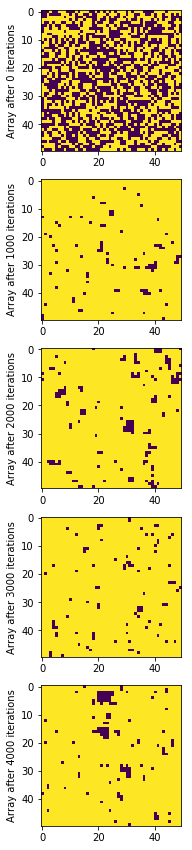

In [192]:
with open("plot_metrics_random.pkl", 'rb') as f:
    plot_metrics = pickle.load(f)

f, axs = plt.subplots(5,1,figsize=(3,15))    

plot_number = 0
for i, arr in enumerate(plot_metrics):
    if (i % 200 != 0):
        continue
    axs[plot_number].imshow(arr)
    axs[plot_number].set_ylabel("Array after " +  str(i*5) +  " iterations")
    plot_number += 1
    if plot_number == 5:
        break
plt.show()
    
    